In [152]:
ANALYZE_TOPICS_PROMPT = "Do not explain what you are doing. Do not self reference. You are an expert text analyst and researcher. Extract 5 keywords for 5 key topics from the following conversation. Return the answer in this format: [['cat', 'dog', 'race', 'mouse', 'house'], ['house', 'sun', 'flower', 'mask', 'shadow'], ['dog', 'house', 'person', 'mouse', 'warm'], ['bark', 'lie', 'dog', 'person', 'lit'], ['fidel', 'castro', 'pepito', 'cojo', 'no']]"


In [5]:
!pip install --upgrade gensim==4.3.0 # Downgrade gensim to a version containing LdaMallet in gensim.models.wrappers

In [115]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import gensim
import numpy as np
import scipy.sparse.linalg as spsplin
import scipy.sparse as spsp

In [116]:
df = pd.read_csv('messages_chat_1.csv')
df.head()

,id,role,content,chat_id,created_at,updated_at
0,1,user,lococococo,1,2024-12-07 13:19:31.264559+00:00,2024-12-07 13:19:31.264559+00:00
1,2,assistant,Pepito el cojo.,1,2024-12-07 13:19:31.266073+00:00,2024-12-07 13:19:31.266073+00:00
2,3,user,dgbdgh,1,2024-12-07 17:11:35.946239+00:00,2024-12-07 17:11:35.947253+00:00
3,4,assistant,Pepito el cojo.,1,2024-12-07 17:11:35.951261+00:00,2024-12-07 17:11:35.951261+00:00
4,5,user,Y si me hablas de fidel?,1,2024-12-07 19:17:33.583373+00:00,2024-12-07 19:17:33.583373+00:00


#Data Preprocessing

In [117]:
black_list = ['más', 'mas', 'unir', 'paises', 'pais', 'espa', 'no', 'os', 'a', 'compa', 'acompa', 'off', 'and', 'grecia', 'the','it', 'to',
              'd',  'et',  'dame',  'il',  'dans', 'that',  'as',   'for',  'it',  'elections',  'would',  'this',  'with', 'york', 'obama', 'chavez', 'gadafi']

In [118]:
def cleaner(word):
  word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '', word, flags=re.MULTILINE)
  word = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', "", word)
  word = re.sub(r'ee.uu', 'eeuu', word)
  word = re.sub(r'\#\.', '', word)
  word = re.sub(r'\n', '', word)
  word = re.sub(r',', '', word)
  word = re.sub(r'\-', ' ', word)
  word = re.sub(r'\.{3}', ' ', word)
  word = re.sub(r'a{2,}', 'a', word)
  word = re.sub(r'é{2,}', 'é', word)
  word = re.sub(r'i{2,}', 'i', word)
  word = re.sub(r'ja{2,}', 'ja', word)
  word = re.sub(r'á', 'a', word)
  word = re.sub(r'é', 'e', word)
  word = re.sub(r'í', 'i', word)
  word = re.sub(r'ó', 'o', word)
  word = re.sub(r'ú', 'u', word)
  word = re.sub('[^a-zA-Z]', ' ', word)
  list_word_clean = []
  for w1 in word.split(" "):
    if  w1.lower() not in stopwords:
      list_word_clean.append(w1.lower())

  bigram_list = bigram[list_word_clean]
  out_text = lemmatization(" ".join(bigram_list))
  return out_text

In [119]:
def lemmatization(texts):
    texts_out = [ token.text for token in nlp(texts) if token.text not in black_list and len(token.text)>2]
    return texts_out

In [11]:
len(df.content.to_list())

35

In [120]:
%%time
bigram = gensim.models.Phrases(df.content.to_list())

CPU times: user 4.94 ms, sys: 0 ns, total: 4.94 ms
Wall time: 4.98 ms


In [121]:
bigram[df.content.to_list()[4].split()]

['Y', 'si', 'me', 'hablas', 'de', 'fidel?']

In [122]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [123]:
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = set(stopwords.words('spanish'))

additional_stopwords=set(black_list)

stopwords = stop.union(additional_stopwords)

print(stopwords)

{'hubiéramos', 'desde', 'elections', 'habrán', 'pais', 'habiendo', 'mías', 'tuvisteis', 'está', 'vuestra', 'with', 'estarán', 'tenéis', 'tuvieran', 'son', 'e', 'tú', 'fueses', 'habrías', 'donde', 'suyas', 'es', 'habíais', 'teníais', 'sentido', 'ya', 'seremos', 'estuvieses', 'tendrás', 'gadafi', 'nuestras', 'hayan', 'for', 'cual', 'eres', 'ante', 'esos', 'tuvimos', 'estado', 'dans', 'd', 'acompa', 'vuestros', 'la', 'esté', 'otra', 'que', 'tienen', 'fuésemos', 'estar', 'tendremos', 'muchos', 'compa', 'sentidas', 'ellas', 'chavez', 'sintiendo', 'habían', 'estarás', 'míos', 'hubisteis', 'sería', 'algo', 'con', 'hay', 'estoy', 'ni', 'unir', 'estad', 'entre', 'tendrá', 'su', 'las', 'tuvieron', 'le', 'seamos', 'and', 'tened', 'fuiste', 'grecia', 'estadas', 'tendré', 'ese', 'estaría', 'había', 'fue', 'fueseis', 'algunos', 'somos', 'el', 'tuvieseis', 'estos', 'estuviese', 'has', 'he', 'están', 'también', 'estabas', 'serías', 'todo', 'siente', 'tuviéramos', 'seáis', 'hubieran', 'hubiera', 'estad

In [124]:
!python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 13.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [17]:
import spacy
nlp = spacy.load('es_core_news_md')

In [18]:
cleaner(df.content[17])

['fidel',
 'castro',
 'lider',
 'politico',
 'cubano',
 'goberno',
 'cuba',
 'tras',
 'liderar',
 'revolucion',
 'cubana',
 'derroco',
 'fulgencio',
 'batista',
 'conocido',
 'implementar',
 'sistema',
 'comunista']

In [19]:
tokenized_doc = df['content'].apply(cleaner)

# de-tokenization
detokenized_doc = []
for i in range(len(df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

In [126]:
%%time
df['clean_content'] = detokenized_doc

CPU times: user 1.9 ms, sys: 0 ns, total: 1.9 ms
Wall time: 1.91 ms


In [127]:
df.head()

,id,role,content,chat_id,created_at,updated_at,clean_content
0,1,user,lococococo,1,2024-12-07 13:19:31.264559+00:00,2024-12-07 13:19:31.264559+00:00,lococococo
1,2,assistant,Pepito el cojo.,1,2024-12-07 13:19:31.266073+00:00,2024-12-07 13:19:31.266073+00:00,pepito cojo
2,3,user,dgbdgh,1,2024-12-07 17:11:35.946239+00:00,2024-12-07 17:11:35.947253+00:00,dgbdgh
3,4,assistant,Pepito el cojo.,1,2024-12-07 17:11:35.951261+00:00,2024-12-07 17:11:35.951261+00:00,pepito cojo
4,5,user,Y si me hablas de fidel?,1,2024-12-07 19:17:33.583373+00:00,2024-12-07 19:17:33.583373+00:00,hablas fidel


#SVD

In [128]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
# vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['clean_content'])

X.shape

(35, 90)

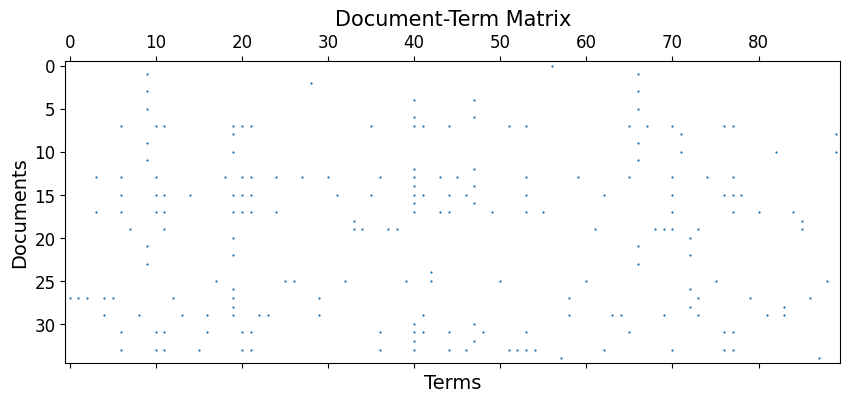

207 (35, 90)


In [129]:
plt.figure(figsize=(10, 20))
plt.spy(X, markersize=0.6)
plt.xlabel("Terms", fontsize=14)
plt.ylabel("Documents", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Document-Term Matrix", fontsize=15)
plt.show()
print(X.nnz, X.shape)

In [130]:
u, sigma, v = spsplin.svds(X.asfptype(), k=5)
print(u.shape, v.shape)

(35, 5) (5, 90)


In [ ]:
# prompt: Explain how spsplin.svds work

The code uses `scipy.sparse.linalg.svds` to perform Singular Value Decomposition (SVD) on a sparse matrix `X`. Let's break down what this function does and its role in the code:

1. **`spsplin.svds(X.asfptype(), k=5)`**:
   - `spsplin.svds` is a function from SciPy's sparse linear algebra module that computes the largest singular values and corresponding singular vectors of a sparse matrix.  It's optimized for sparse matrices, which means it's more efficient than using standard SVD algorithms on large matrices where most elements are zero.

   - `X.asfptype()`:  Converts the sparse matrix `X` to a floating-point type. This is necessary because SVD operates on numerical data.

   - `k=5`:  This is the crucial parameter. It specifies the number of singular values and corresponding singular vectors to compute. In this case, it's set to 5, meaning the function will return the 5 largest singular values and their corresponding left (u) and right (v) singular vectors.

2. **`u, sigma, v = ...`**: The results of `spsplin.svds` are unpacked into three variables:
   - `u`: A NumPy array representing the left singular vectors.  It will have shape (n_samples, k), where `n_samples` is the number of documents/rows in the original sparse matrix `X`, and `k` is 5 (the number of singular values requested).  Each column of `u` is a left singular vector.

   - `sigma`: A 1D NumPy array containing the singular values, sorted in descending order.  Its shape is (k,).  These values represent the "importance" of each corresponding singular vector.

   - `v`: A NumPy array representing the right singular vectors. It will have shape (k, n_features), where `n_features` is the number of unique words/terms in the vocabulary (the columns of `X`).  Each row of `v` is a right singular vector.

3. **Purpose in the Context of the Code**:  The code creates a document-term matrix `X` using `CountVectorizer`. This matrix represents the frequency of each word in each document. SVD is then applied to this matrix to reduce its dimensionality while retaining important information.

   - **Dimensionality Reduction**: SVD effectively captures the most significant relationships between words and documents. The top `k` singular values and vectors capture the main patterns in the data.  By using only the first 5 singular values and vectors, the code reduces the dimensionality of the data from a potentially large number of features (words) to just 5 latent "topics."

   - **Topic Modeling**:  The right singular vectors (`v`) in this context can be interpreted as topic representations.  Each row of `v` represents a latent topic, and the values within each row show the importance of each word to that particular topic.  The left singular vectors (`u`) represent document-topic relationships: each row shows the weight of each topic in a particular document.

In summary, `spsplin.svds` is used for dimensionality reduction and to identify the main underlying "topics" in a collection of text documents. The `k=5` parameter indicates that the goal is to find 5 latent topics from the data.


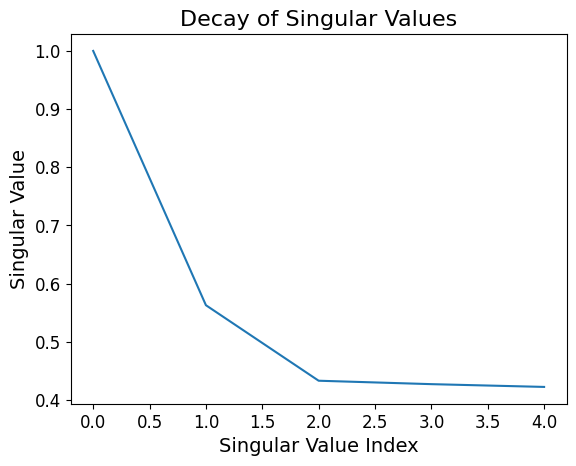

In [131]:
plt.plot(sigma[::-1]/sigma[-1])
plt.xlabel("Singular Value Index", fontsize=14)
plt.ylabel("Singular Value", fontsize=14)
plt.title("Decay of Singular Values", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [132]:
terms = vectorizer.get_feature_names_out()
print(len(terms))
print(terms)

90
['abril' 'actualizacion' 'asumio' 'batista' 'canel' 'cargo' 'castro'
 'celebridad' 'clasificado' 'cojo' 'comunista' 'conocido' 'conocimientos'
 'considere' 'controvers' 'controversia' 'controvertida' 'cristianismo'
 'crucial' 'cuba' 'cubana' 'cubano' 'cuestion' 'depende' 'derroco'
 'desarrollador' 'desarrollo' 'desempe' 'dgbdgh' 'diaz' 'dictador'
 'dirigido' 'django' 'donald' 'empresario' 'establecer' 'establecio'
 'estadounidense' 'estilo' 'estudiante' 'fidel' 'figura' 'freddy'
 'fulgencio' 'goberno' 'gobierno' 'haber' 'hablas' 'historia'
 'implementar' 'interesa' 'isla' 'legado' 'lider' 'liderado' 'liderar'
 'lococococo' 'matriz' 'miguel' 'ministro' 'musical' 'nacionalistas'
 'objeto' 'oficialmente' 'opiniones' 'papel' 'pepito' 'polemica'
 'polemico' 'politicas' 'politico' 'president' 'presidenta' 'presidente'
 'primer' 'produccion' 'regimen' 'revolucion' 'revolucionario' 'segun'
 'sistema' 'subjetiva' 'terrorist' 'terrorista' 'tras' 'trump' 'ultima'
 'unitaria' 'web' 'who']


In [ ]:
for i, comp in enumerate(v):
    print(comp.shape, np.linalg.norm(comp))
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x: x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print("Word: {}, score: {}".format(t[0], t[1]))

(90,) 1.0
Topic 0: 
Word: hablas, score: 0.6373629858416315
Word: fidel, score: 0.5754640452767742
Word: regimen, score: 0.08771900345394398
Word: figura, score: 0.0695915500983351
Word: haber, score: 0.05532050236208391
(90,) 1.0
Topic 1: 
Word: hablas, score: 0.28958203439569197
Word: fidel, score: 0.27394944177884817
Word: batista, score: 0.23750484737707853
Word: derroco, score: 0.23750484737707853
Word: fulgencio, score: 0.23750484737707853
(90,) 0.9999999999999999
Topic 2: 
Word: cojo, score: 0.7071067811865475
Word: pepito, score: 0.7071067811865475
Word: derroco, score: 1.3380255135651196e-15
Word: fulgencio, score: 1.3380255135651196e-15
Word: batista, score: 1.3380255135651194e-15
(90,) 0.9999999999999999
Topic 3: 
Word: castro, score: 0.08021777480376578
Word: fidel, score: 0.07325249459100036
Word: establecio, score: 0.06336077340517618
Word: comunista, score: 0.0424549462475154
Word: cubana, score: 0.0424549462475154
(90,) 1.0000000000000002
Topic 4: 
Word: castro, score: 

In [61]:
top_docs = np.argmax(u, axis=0)
print(top_docs)
for i, j in enumerate(top_docs):
    print("Topic {}".format(i))
    print(df.content[j])
    print(" ")

[32 13 19 13 25]
Topic 0
Y si me hablas de Fidel?
 
Topic 1
Fidel Castro fue un líder político cubano que desempeñó un papel crucial en la Revolución Cubana, que derrocó al dictador Fulgencio Batista en 1959. Castro estableció un gobierno comunista y fue primer ministro
 
Topic 2
Donald Trump es un empresario, celebridad y político estadounidense. Fue el 45.º presidente de EE. UU. (2017-2021), conocido por su estilo polémico y políticas nacionalistas.
 
Topic 3
Fidel Castro fue un líder político cubano que desempeñó un papel crucial en la Revolución Cubana, que derrocó al dictador Fulgencio Batista en 1959. Castro estableció un gobierno comunista y fue primer ministro
 
Topic 4
Freddy es estudiante y desarrollador web. Le interesa el desarrollo web con Django, la producción musical y el cristianismo.
 


In [143]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

# Create a Dictionary from the tokenized documents
id2word = Dictionary(tokenized_doc)
corpus = [id2word.doc2bow(doc) for doc in tokenized_doc]

In [144]:
# Assuming 'v' from the SVD is available as a NumPy array
# 'v' should have shape (k, n_features) where k is the number of topics
# and n_features is the number of unique words

# Convert 'v' to the correct format for CoherenceModel
# Each row in 'v' represents a topic, and each element in the row represents a word's importance to the topic
topics = []
for i, comp in enumerate(v):
  terms_comp = zip(terms, comp)
  sorted_terms = sorted(terms_comp, key=lambda x: x[1], reverse=True)[:5]
  topic_words = [t[0] for t in sorted_terms]
  topics.append(topic_words)

# Calculate coherence
coherence_model = CoherenceModel(topics=topics, texts=tokenized_doc, dictionary=id2word, coherence='c_v')
coherence_score_svd = coherence_model.get_coherence()

print(f"Coherence Score: {coherence_score_svd}")

Coherence Score: 0.6596747191842394


#K-means

In [145]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Display the feature names
feature_names = vectorizer.get_feature_names_out()
print("Feature Names:\n", feature_names)

# 2. Apply K-means clustering
num_clusters = 5  # Set the number of clusters (topics)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Get cluster assignments for each document
labels = kmeans.labels_
documents = df['clean_content'].tolist()

# Print the cluster assignments
print("\nCluster Assignments:")
for i, doc in enumerate(documents):
    print(f"Document {i+1}: Cluster {labels[i]}")

# 3. Display the top terms in each cluster
def print_top_terms_per_cluster(model, feature_names, n_terms=5):
    for cluster_idx, centroid in enumerate(model.cluster_centers_):
        print(f"\nCluster {cluster_idx}:")
        top_indices = centroid.argsort()[-n_terms:][::-1]
        top_terms = [feature_names[i] for i in top_indices]
        print("Top Terms:", ", ".join(top_terms))

print_top_terms_per_cluster(kmeans, feature_names)

# 4. Visualize the clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())


Feature Names:
 ['abril' 'actualizacion' 'asumio' 'batista' 'canel' 'cargo' 'castro'
 'celebridad' 'clasificado' 'cojo' 'comunista' 'conocido' 'conocimientos'
 'considere' 'controvers' 'controversia' 'controvertida' 'cristianismo'
 'crucial' 'cuba' 'cubana' 'cubano' 'cuestion' 'depende' 'derroco'
 'desarrollador' 'desarrollo' 'desempe' 'dgbdgh' 'diaz' 'dictador'
 'dirigido' 'django' 'donald' 'empresario' 'establecer' 'establecio'
 'estadounidense' 'estilo' 'estudiante' 'fidel' 'figura' 'freddy'
 'fulgencio' 'goberno' 'gobierno' 'haber' 'hablas' 'historia'
 'implementar' 'interesa' 'isla' 'legado' 'lider' 'liderado' 'liderar'
 'lococococo' 'matriz' 'miguel' 'ministro' 'musical' 'nacionalistas'
 'objeto' 'oficialmente' 'opiniones' 'papel' 'pepito' 'polemica'
 'polemico' 'politicas' 'politico' 'president' 'presidenta' 'presidente'
 'primer' 'produccion' 'regimen' 'revolucion' 'revolucionario' 'segun'
 'sistema' 'subjetiva' 'terrorist' 'terrorista' 'tras' 'trump' 'ultima'
 'unitaria' 'web'

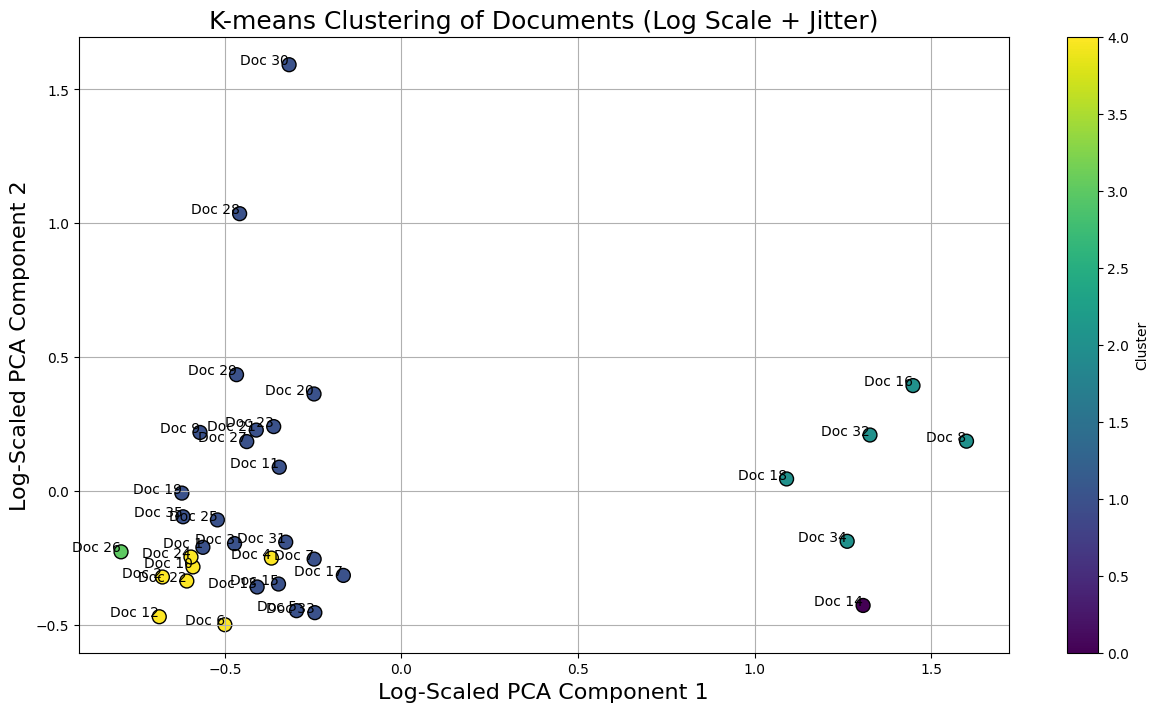

In [146]:
# Apply a logarithmic transformation to spread the points out
X_pca_log = np.sign(X_pca) * np.log1p(np.abs(X_pca))

# Add jitter to the points
jitter_strength = 0.1
X_pca_jittered = X_pca_log + np.random.normal(0, jitter_strength, X_pca_log.shape)

# Plot the points with jitter and logarithmic transformation
plt.figure(figsize=(15, 8))
plt.scatter(X_pca_jittered[:, 0], X_pca_jittered[:, 1], c=labels, cmap='viridis', marker='o', s=100, edgecolor='k')

# Annotate the points with document numbers
for i, doc in enumerate(documents):
    plt.annotate(f"Doc {i+1}", (X_pca_jittered[i, 0], X_pca_jittered[i, 1]), fontsize=10, ha='right')

plt.title("K-means Clustering of Documents (Log Scale + Jitter)", fontsize=18)
plt.xlabel("Log-Scaled PCA Component 1", fontsize=16)
plt.ylabel("Log-Scaled PCA Component 2", fontsize=16)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [110]:
# 5. Compute C_v coherence score
# Convert the documents into a format suitable for Gensim
# texts = [doc.lower().split() for doc in documents]
# dictionary = Dictionary(texts)
# corpus = [dictionary.doc2bow(text) for text in texts]

# Extract top words per cluster to form topics
def get_cluster_topics(model, feature_names, n_terms=5):
    topics = []
    for centroid in model.cluster_centers_:
        top_indices = centroid.argsort()[-n_terms:][::-1]
        top_terms = [feature_names[i] for i in top_indices]
        topics.append(top_terms)
    return topics

topics = get_cluster_topics(kmeans, feature_names)
print(topics)

# Create a coherence model
coherence_model = CoherenceModel(topics=topics, texts=tokenized_doc, dictionary=id2word, coherence='c_v')
coherence_score_kmeans = coherence_model.get_coherence()
print(f"C_v Coherence Score: {coherence_score_kmeans:.4f}")

[['castro', 'papel', 'revolucion', 'cubano', 'cubana'], ['cuba', 'hablas', 'fidel', 'presidenta', 'presidente'], ['goberno', 'castro', 'cubana', 'cubano', 'conocido'], ['web', 'django', 'produccion', 'freddy', 'estudiante'], ['cojo', 'pepito', 'who', 'dirigido', 'depende']]
C_v Coherence Score: 0.7244


#OpenAI LLM

In [ ]:
from openai import OpenAI

def get_key_topics(text):
    sys_prompt_string = f"{ANALYZE_TOPICS_PROMPT}\nCONVERSATION:\n{text}"
    client = OpenAI(
        api_key='',
    )
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": sys_prompt_string}
        ],
        max_tokens=200,
        n=1,
        stop=None,
        temperature=0.5,
    )
    response_str = response.choices[0].message.content
    key_topics = eval(response_str) # Evaluate string as python list
    return key_topics

text_data = "\n".join(df['content'].astype(str).tolist()) # Combine all document content into one string.

key_topics_openai = get_key_topics(text_data)

# Convert key_topics_openai to token IDs using the dictionary
key_topics_openai_ids = [[id2word.token2id.get(word.lower(), None) for word in topic] for topic in key_topics_openai]
# Filter out None values (words not in dictionary)
key_topics_openai_ids = [[token_id for token_id in topic if token_id is not None] for topic in key_topics_openai_ids]

coherence_model = CoherenceModel(topics=key_topics_openai_ids, texts=texts, dictionary=dictionary, coherence='c_v') # use tokenized_doc as texts
coherence_score_openai = coherence_model.get_coherence()
print(f"Coherence Score (OpenAI Topics): {coherence_score_openai}")

Coherence Score (OpenAI Topics): 0.8441414906890733


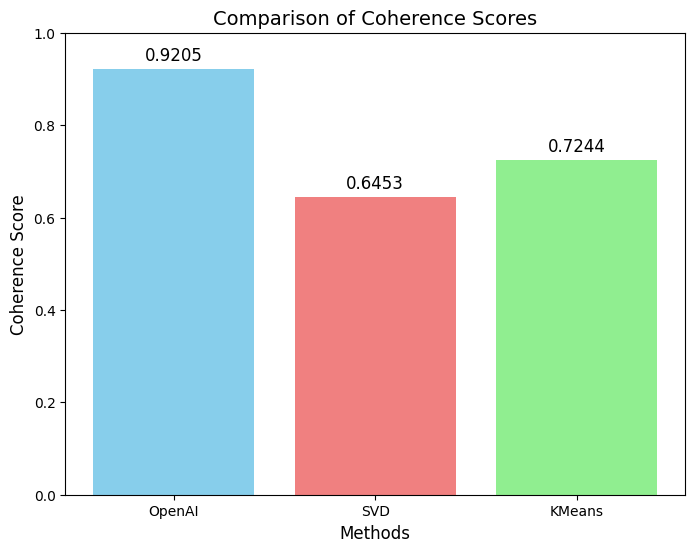

In [113]:
# prompt: compare the coherence_score_openai, coherence_score_svd and coherence_score_kmeans in the plot

import matplotlib.pyplot as plt

coherence_scores = {
    'OpenAI': coherence_score_openai,
    'SVD': coherence_score_svd,
    'KMeans': coherence_score_kmeans
}

methods = list(coherence_scores.keys())
scores = list(coherence_scores.values())

plt.figure(figsize=(8, 6))
plt.bar(methods, scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Methods", fontsize=12)
plt.ylabel("Coherence Score", fontsize=12)
plt.title("Comparison of Coherence Scores", fontsize=14)
plt.ylim(0, 1)  # Adjust y-axis limits if needed

for i, score in enumerate(scores):
    plt.text(i, score + 0.01, f"{score:.4f}", ha='center', va='bottom', fontsize=12)

plt.show()